# First questions

## Import libraries and dataset

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [119]:
df = pd.read_csv(r"mtcars.csv")
df.sample(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


In [120]:
# Meta data
print("Metadata")
print("No. of columns: ", df.columns.shape[0])
print("Column names: ", df.columns.values)
print("Total null values: ", df.isnull().sum().sum())
print("Column-wise null values:")
print(df.isnull().sum())
print("\nDescription of data")
df.describe()

Metadata
No. of columns:  12
Column names:  ['model' 'mpg' 'cyl' 'disp' 'hp' 'drat' 'wt' 'qsec' 'vs' 'am' 'gear'
 'carb']
Total null values:  0
Column-wise null values:
model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

Description of data


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### 1. Car with best and worst mpg

In [121]:
best_mpg = df[df['mpg'] == df['mpg'].max()]
worst_mpg = df[df['mpg'] == df['mpg'].min()]
print('Car with best mpg', best_mpg['model'].values,)
print('Car with worst mpg', worst_mpg['model'].values )

Car with best mpg ['Toyota Corolla']
Car with worst mpg ['Cadillac Fleetwood' 'Lincoln Continental']


In [122]:
best_mpg

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [123]:
worst_mpg

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4


### 2. Car with the worst horsepower

In [124]:
worst_hp = df[df['hp'] == df['hp'].min()]
worst_hp

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


### 3. Find the 5 number summary and draw the boxplot of displacement

Five number summary for displacement

Minimum:  71.1	Q1:  120.825	Mean/Q2:  230.72187499999998	Q3:  326.0	Maximum:  472.0	

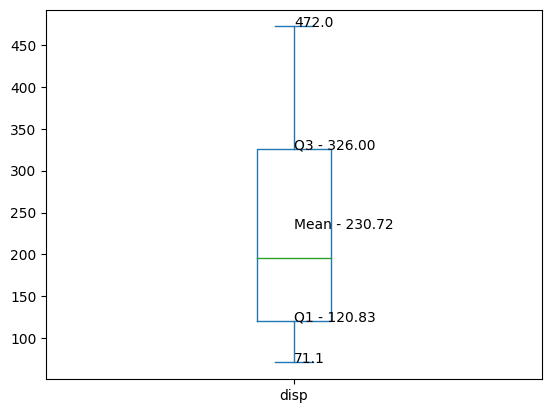

In [125]:
q1 = df['disp'].quantile(.25)
mean = df['disp'].mean()
q3 = df['disp'].quantile(.75)
min_ = df['disp'].min()
max_ = df['disp'].max()

print("Five number summary for displacement\n")
print("Minimum: ", min_, end='\t')
print("Q1: ", q1, end='\t')
print("Mean/Q2: ", mean, end='\t')
print("Q3: ", q3, end='\t')
print("Maximum: ", max_, end='\t')

df['disp'].plot(kind='box')
plt.annotate(max_, (1, max_))
plt.annotate(min_, (1, min_))
plt.annotate("Mean - %.2f"%mean, (1, mean))
plt.annotate("Q1 - %.2f"%q1, (1, q1))
plt.annotate("Q3 - %.2f"%q3, (1, q3))
plt.show()

### 4) Draw a histogram for MPG and comment on the distribution.

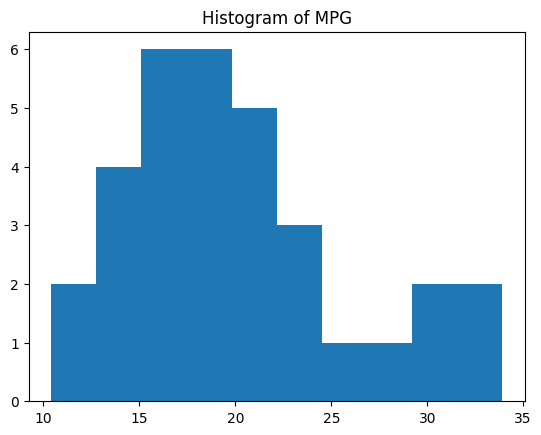

In [126]:
plt.hist(df['mpg'])
plt.title('Histogram of MPG')
plt.show()

#### Histogram shows that the most of the MPG of cars lies in the range of 15-20

### 5) What is average MPG for manual vs. automatic cars?

In [127]:
man_cars = df[df['am'] == 0]
auto_cars = df[df['am'] == 1]
man_cars.sample(4)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [128]:
auto_cars.sample(4)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4


In [129]:
print("Average MPG for manual cars: ", man_cars['mpg'].mean())
print("Average MPG for automatic cars: ", auto_cars['mpg'].mean())

Average MPG for manual cars:  17.147368421052633
Average MPG for automatic cars:  24.39230769230769


### 6) Draw a side by side box plot of fuel efficiency (MPG) for transmission ( manual vs. automatic) cars. Analyze and write about fuel efficiency in each group (manual vs. automatic).

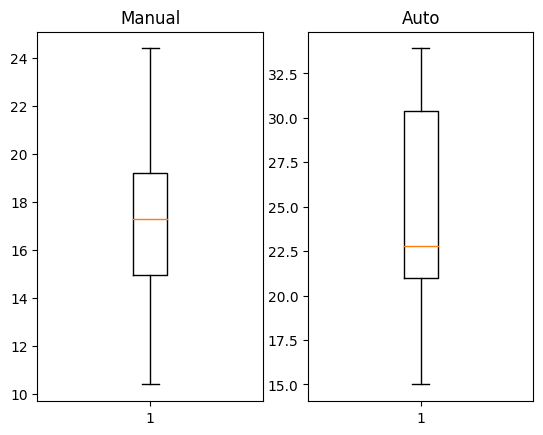

In [130]:
fig, axs = plt.subplots(1,2)
axs[0].boxplot(man_cars['mpg'])
axs[0].set_title("Manual")

axs[1].boxplot(auto_cars['mpg'])
axs[1].set_title("Auto")

plt.show()

#### The mean fuel efficiency of Manual is lower than the Fuel efficiency of Auto
#### Fuel efficiency of manual varies from a range of 15 to 19
#### While fuel efficiency of auto varies from a range of 21 to 30.5

### 8) Draw a side by side box plot of fuel efficiency for number of gears. Analyze and write about fuel efficiency and number of gears.

In [131]:
# Finding out possible values for number of gears
df['gear'].unique().tolist()

[4, 3, 5]

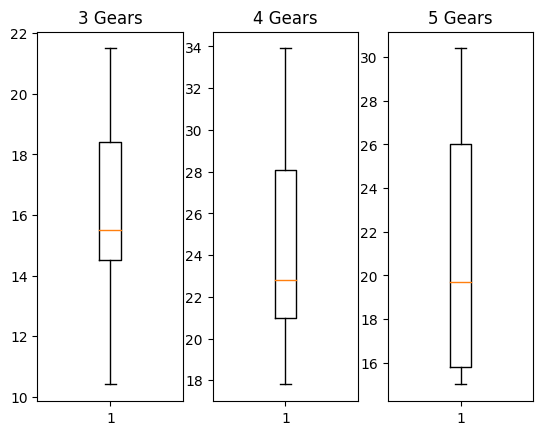

In [132]:
# plotting for 4, 3, 5

three_gear = df[df['gear'] == 3]
four_gear = df[df['gear'] == 4]
five_gear = df[df['gear'] == 5]

fig, axis = plt.subplots(1, 3)

axis[0].boxplot(three_gear['mpg'])
axis[0].set_title("3 Gears")

axis[1].boxplot(four_gear['mpg'])
axis[1].set_title("4 Gears")

axis[2].boxplot(five_gear['mpg'])
axis[2].set_title("5 Gears")

plt.show()

#### From the given graph we can see that
* 3 Geared cars have the minimum fuel efficiency
* 4 Geared cars have a higher average fuel efficiency
* 5 Geared car's fuel efficiency varries the most, varrying from 16 to 26

### 9) Create a crosstab displaying horse power and number of cylinders and explain the relationship between the two attributes.

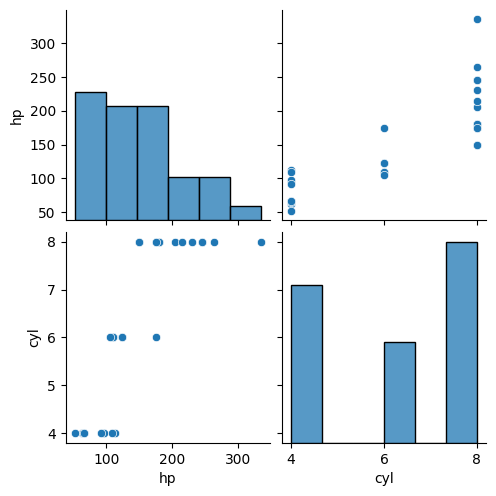

In [133]:
sns.pairplot(df[['hp', 'cyl']])

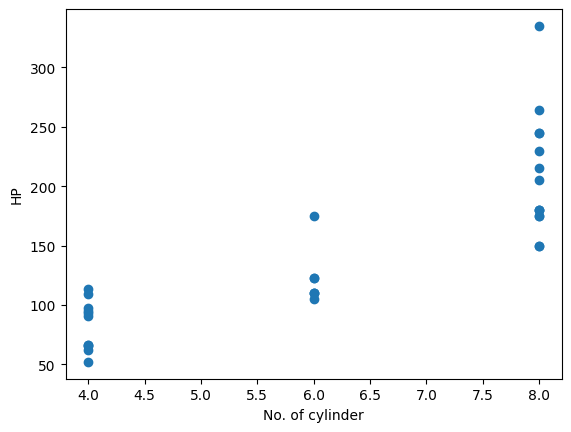

In [134]:
plt.scatter(df['cyl'],df['hp'])
plt.ylabel('HP')
plt.xlabel('No. of cylinder')
plt.show()

<Axes: >

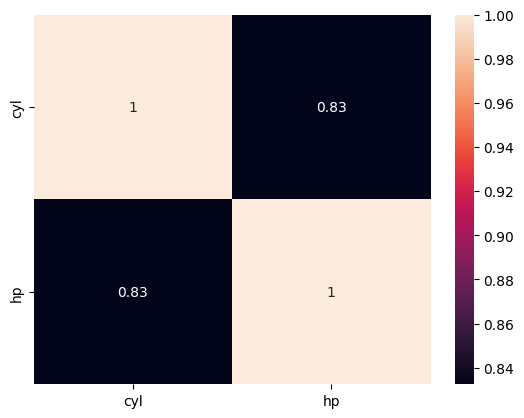

In [135]:
cmat = df[['cyl','hp']].corr()
sns.heatmap(cmat, annot=True,)

#### From the following plots we can understand as no. of cylinders increase the Horse Power also increases, hence they are in a positive co relation

### 10) Draw a scatter plot to understand the relationship between displacement and gross horse power. Use the correlation coefficient and infer the relationship.


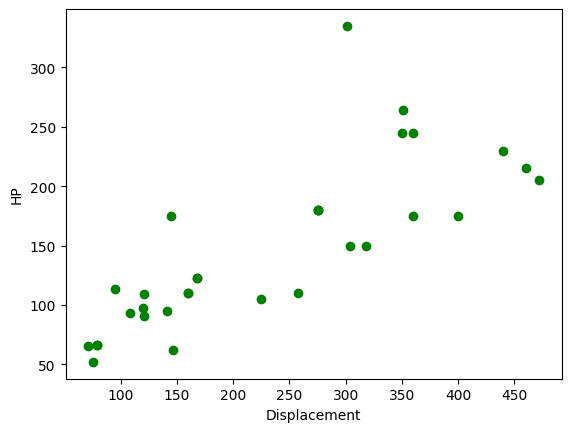

In [136]:
plt.scatter(df['disp'],df['hp'], color="Green")
plt.ylabel('HP')
plt.xlabel('Displacement')
plt.show()

          disp        hp
disp  1.000000  0.790949
hp    0.790949  1.000000


<Axes: >

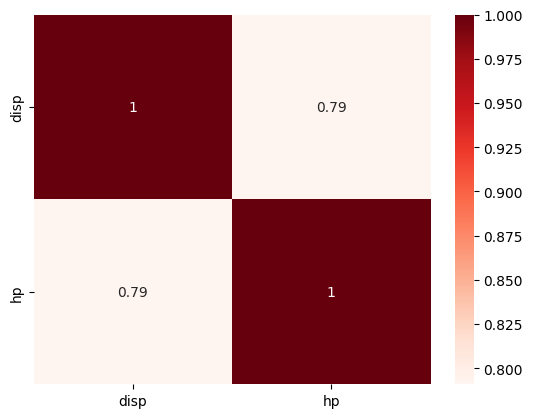

In [137]:
mat = df[['disp', 'hp']].corr()
print(mat)
sns.heatmap(mat, annot=True, cmap='Reds')

#### Horse Power and Displacement have 0.79 person's correlation, therefore we can infer that they have a postive corelation

# Second Question

## Importing libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix


### Iris Dataset

In [139]:
dataset = r"IRIS.csv"
df = pd.read_csv(dataset)
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
27,28,5.2,3.5,1.5,0.2,Iris-setosa
134,135,6.1,2.6,5.6,1.4,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa
126,127,6.2,2.8,4.8,1.8,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica


In [140]:
## Metadata
print("Metadata")
print("No. of columns: ", df.columns.shape[0])
print("Column names: ", df.columns.values)
print("Target column and values: ", 'Species', df['Species'].unique())
print("Total null values: ", df.isnull().sum().sum())
print("Column-wise null values:")
print(df.isnull().sum())
print("\nDescription of data")
df.describe()

Metadata
No. of columns:  6
Column names:  ['Id' 'SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm'
 'Species']
Target column and values:  Species ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Total null values:  0
Column-wise null values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Description of data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [141]:
# No null values, so skipping fillna
# Dropping ID
df.drop(columns=['Id'], inplace=True)

In [142]:
X = df.drop(columns=['Species'])
y = df[['Species']]
X.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
8,4.4,2.9,1.4,0.2
136,6.3,3.4,5.6,2.4
108,6.7,2.5,5.8,1.8
140,6.7,3.1,5.6,2.4
101,5.8,2.7,5.1,1.9


In [143]:
# No need for Scaling
# Label Encoding
le = LabelEncoder()
le_y = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [144]:
exl = []

#### Train test split 50, 50

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,le_y, test_size=0.5, shuffle=True, random_state=42)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((75, 4), (75,), (75, 4), (75,))

In [146]:
# KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"iris",
    "model": "knn",
    "split_size": 0.5,
    "neighbours": 2,
    "accuracy": knn_accuracy,

})

Accuracy:  0.96


In [147]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"iris",
    "model": "knn",
    "split_size": 0.5,
    "neighbours": 3,
    "accuracy": knn_accuracy,

})

Accuracy:  0.9733333333333334


In [148]:
# KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"iris",
    "model": "knn",
    "split_size": 0.5,
    "neighbours": 4,
    "accuracy": knn_accuracy,

})

Accuracy:  0.9333333333333333


In [149]:
exl_df = pd.DataFrame(exl)
exl_df.to_excel("knn_neighbour_var.xlsx")
exl_df

,dataset,model,split_size,neighbours,accuracy
0,iris,knn,0.5,2,0.960000
1,iris,knn,0.5,3,0.973333
2,iris,knn,0.5,4,0.933333


In [150]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", dt_acc)
exl.append({
    "dataset":"iris",
    "model": "Decision Tree",
    "split_size": 0.5,
    "accuracy": dt_acc,

})

Accuracy:  0.9466666666666667


In [151]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", dt_acc)
exl.append({
    "dataset":"iris",
    "model": "NB",
    "split_size": 0.5,
    "accuracy": nb_acc,

})

Accuracy:  0.9466666666666667


In [152]:
exl_df = pd.DataFrame(exl)
exl_df.to_excel("iris_only.xlsx")
exl_df

,dataset,model,split_size,neighbours,accuracy
0,iris,knn,0.5,2.0,0.960000
1,iris,knn,0.5,3.0,0.973333
2,iris,knn,0.5,4.0,0.933333
3,iris,Decision Tree,0.5,NaN,0.946667
4,iris,NB,0.5,NaN,0.986667


#### Train test split 70, 30

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,le_y, test_size=0.3, shuffle=True, random_state=42)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((105, 4), (105,), (45, 4), (45,))

In [154]:
# KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"iris",
    "model": "knn",
    "split_size": 0.3,
    "neighbours": 2,
    "accuracy": knn_accuracy,

})

Accuracy:  1.0


In [155]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"iris",
    "model": "knn",
    "split_size": 0.3,
    "neighbours": 3,
    "accuracy": knn_accuracy,

})

Accuracy:  1.0


In [156]:
# KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"iris",
    "model": "knn",
    "split_size": 0.3,
    "neighbours": 4,
    "accuracy": knn_accuracy,

})

Accuracy:  1.0


In [157]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", dt_acc)
exl.append({
    "dataset":"iris",
    "model": "NB",
    "split_size": 0.3,
    "accuracy": nb_acc,

})

Accuracy:  0.9466666666666667


Accuracy:  1.0


<Axes: >

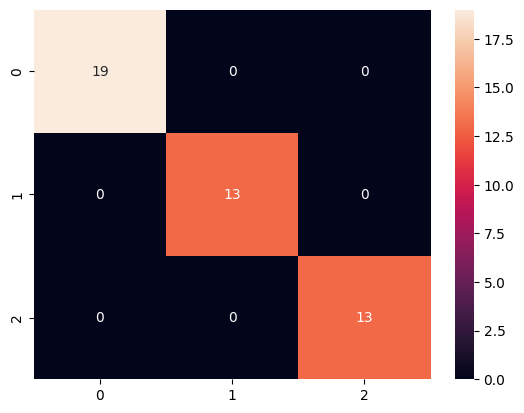

In [158]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", dt_acc)
exl.append({
    "dataset":"iris",
    "model": "Decision Tree",
    "split_size": 0.3,
    "accuracy": dt_acc,

})
cmat = confusion_matrix(y_test, y_pred)
sns.heatmap(cmat, annot=True)

In [159]:
exl_df = pd.DataFrame(exl)
exl_df.to_excel("iris_only_with_split.xlsx")
exl_df

,dataset,model,split_size,neighbours,accuracy
0,iris,knn,0.5,2.0,0.960000
1,iris,knn,0.5,3.0,0.973333
2,iris,knn,0.5,4.0,0.933333
3,iris,Decision Tree,0.5,NaN,0.946667
4,iris,NB,0.5,NaN,0.986667
5,iris,knn,0.3,2.0,1.000000
6,iris,knn,0.3,3.0,1.000000
7,iris,knn,0.3,4.0,1.000000
8,iris,NB,0.3,NaN,0.977778
9,iris,Decision Tree,0.3,NaN,1.000000


In [160]:
dataset = r"Wine.csv"
df = pd.read_csv(dataset)
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
148,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650,3
76,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392,2
96,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625,2
154,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640,3
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,2


In [161]:
## Metadata
print("Metadata")
print("No. of columns: ", df.columns.shape[0])
print("Column names: ", df.columns.values)
print("Total null values: ", df.isnull().sum().sum())
print("Column-wise null values:")
print(df.isnull().sum())
print("\nDescription of data")
df.describe()

Metadata
No. of columns:  14
Column names:  ['Alcohol' 'Malic_Acid' 'Ash' 'Ash_Alcanity' 'Magnesium' 'Total_Phenols'
 'Flavanoids' 'Nonflavanoid_Phenols' 'Proanthocyanins' 'Color_Intensity'
 'Hue' 'OD280' 'Proline' 'Customer_Segment']
Total null values:  0
Column-wise null values:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

Description of data


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,le_y, test_size=0.3, shuffle=True, random_state=42)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((105, 4), (105,), (45, 4), (45,))

In [163]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_accuracy)
exl.append({
    "dataset":"wine",
    "model": "knn",
    "split_size": 0.3,
    "neighbours": 3,
    "accuracy": knn_accuracy,

})

Accuracy:  1.0


In [164]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", dt_acc)
exl.append({
    "dataset":"wine",
    "model": "NB",
    "split_size": 0.3,
    "accuracy": nb_acc,

})

Accuracy:  1.0


Accuracy:  1.0


<Axes: >

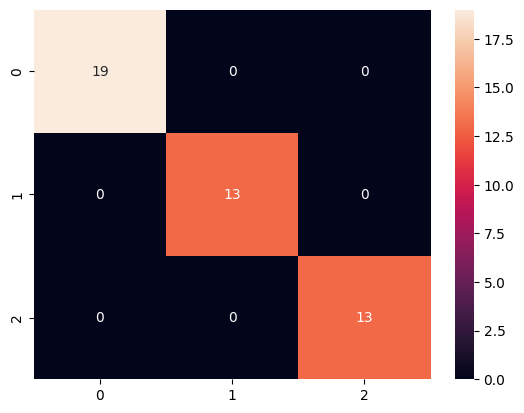

In [165]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", dt_acc)
exl.append({
    "dataset":"wine",
    "model": "Decision Tree",
    "split_size": 0.3,
    "accuracy": dt_acc,

})
cmat = confusion_matrix(y_test, y_pred)
sns.heatmap(cmat, annot=True)

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
#svm

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

import seaborn as sns

In [4]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
print("Accuracy", accuracy_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred, average='weighted'))

NameError: ignored

In [5]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x = minmax.fit_transform(x)
meanSqrError = metrics.mean_squared_error(y_test,y_pred)
meanAbsError = metrics.mean_absolute_error(y_test,y_pred)
rootMeanSqrError = np.sqrt(meanSqrError)





plt.figure(figsize=(50,12))
Tree = tree.plot_tree(dt,feature_names=xcols,class_names=ycol)
plt.show()

NameError: ignored

In [ ]:
#mlr:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Intercept ",int(model.intercept_))
print("Coeffecient ",model.coef_)
pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_int})

accuracy_score(y_test,y_pred_int)
r2_score(y_test,y_pred_int)

cm = confusion_matrix(y_test,y_pred_int)

import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['0','1'],yticklabels=['0','1'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Cm')
plt.show()



#for prediction :
hours_new=[[2]]
marks_pred = model.predict(hours_new)
marks_pred


df1.plot(kind='scatter',x='Hours',y='Marks')
plt.plot(hours,model.predict(hours))